# Qual o problema quero resolver com a solução de ML?

- R: Como aumentar a taxa de aprovação, reduzindo a inadimplência ao mesmo tempo?

### Entendimento do negócio:

- Que tipo de crédito o cliente oferece?
- Em que parte do processo de aprovação de crédito, o modelo será aplicado?
- Todas as features presentes no dataset ajudam a responder o desejo do cliente?

### Entendimento Dataset:

- idade: A idade do cliente..
- numero_de_dependentes: O número de pessoas dependentes do cliente.
- salario_mensal: Salário mensal do cliente.
- numero_emprestimos_imobiliarios: Quantidade de empréstimos imobiliários que o cliente possui em aberto.
- numero_vezes_passou_90_dias: Número de vezes que o tomador passou mais de 90 dias em atraso.
- util_linhas_inseguras: Quanto que o cliente está usando, relativamente ao limite dele, de linhas de crédito que não são seguradas por qualquer bem do tomador e.g: imoveis, carros etc.
- vezes_passou_de_30_59_dias: Número de vezes que o cliente atrasou, entre 30 e 59 dias, o pagamento de um empréstimo.
- razao_debito: Razão entre as dívidas e o patrimônio do tomador. razão débito Dividas/Patrimônio
- numero_linhas_crdto_aberto: Número de empréstimos em aberto pelo cliente.
- numero_de_vezes_que_passou_60_89_dias: Número de vezes que o cliente atrasou, entre 60 e 89 dias, o pagamento de um empréstimo.

### Imports iniciais necessários

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Sampling Methods
from imblearn.over_sampling import SMOTE

In [2]:
df_train = pd.read_csv('treino.csv')
df_test = pd.read_csv('teste.csv')

Primeiramente, foi utilizada a função head(), tanto no dataframe de treino e teste de maneira que possa possilitar uma visão geral da estrutura dos dados.

In [3]:
df_train.head()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
df_test.head()

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,0.025849,62,0,0.081775,8180.0,3,0,2,0,0.0
1,0.667083,55,0,0.153112,2200.0,3,0,0,0,0.0
2,0.007093,44,0,0.148800,7499.0,20,0,1,0,0.0
3,0.091213,54,0,0.351635,5900.0,15,0,1,1,0.0
4,0.112680,54,0,0.065959,2167.0,3,0,0,0,0.0


Visualizar todas as colunas do dataset

In [5]:
df_train.columns

Index(['inadimplente', 'util_linhas_inseguras', 'idade',
       'vezes_passou_de_30_59_dias', 'razao_debito', 'salario_mensal',
       'numero_linhas_crdto_aberto', 'numero_vezes_passou_90_dias',
       'numero_emprestimos_imobiliarios',
       'numero_de_vezes_que_passou_60_89_dias', 'numero_de_dependentes'],
      dtype='object')

# 0 - Pré processando e analisando os dados

### Análise Estatistica

O metódo .info() imprime as informações sobre um DataFrame, incluindo o dtype, as colunas do índice, valores não nulos e uso de memória.

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 11 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   inadimplente                           110000 non-null  int64  
 1   util_linhas_inseguras                  110000 non-null  float64
 2   idade                                  110000 non-null  int64  
 3   vezes_passou_de_30_59_dias             110000 non-null  int64  
 4   razao_debito                           110000 non-null  float64
 5   salario_mensal                         88237 non-null   float64
 6   numero_linhas_crdto_aberto             110000 non-null  int64  
 7   numero_vezes_passou_90_dias            110000 non-null  int64  
 8   numero_emprestimos_imobiliarios        110000 non-null  int64  
 9   numero_de_vezes_que_passou_60_89_dias  110000 non-null  int64  
 10  numero_de_dependentes                  107122 non-null  

O método describe() exibe informações estatística da base de dados

 - count: a quantidade de linhas
 - mean: média dos valores por coluna
 - std: desvio padrão
 - min: valor mínimo
 - quartis (25%,50% e 75%)
 - max: valor máximo

In [7]:
df_train.describe()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
count,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,8.823700e+04,110000.000000,110000.000000,110000.000000,110000.000000,107122.000000
mean,0.066645,5.929979,52.255636,0.424055,354.823589,6.637411e+03,8.445573,0.269955,1.019891,0.243891,0.757482
std,0.249408,252.301965,14.768241,4.240780,2074.140421,1.338395e+04,5.139026,4.217326,1.135989,4.204137,1.114670
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030054,41.000000,0.000000,0.175016,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.155936,52.000000,0.000000,0.366682,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.562806,63.000000,0.000000,0.866874,8.225000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [8]:
#Porcentagem de numeros em branco
df_train.isnull().sum() / len(df_train)*100

inadimplente                              0.000000
util_linhas_inseguras                     0.000000
idade                                     0.000000
vezes_passou_de_30_59_dias                0.000000
razao_debito                              0.000000
salario_mensal                           19.784545
numero_linhas_crdto_aberto                0.000000
numero_vezes_passou_90_dias               0.000000
numero_emprestimos_imobiliarios           0.000000
numero_de_vezes_que_passou_60_89_dias     0.000000
numero_de_dependentes                     2.616364
dtype: float64

Há dados ausentes nas colunas de numero_de_dependentes e salario_mensal. Vou utilizar a média para preencher os dados faltantes.

In [9]:
#Verificando se tem campos em branco base de teste
df_test.isnull().sum()

util_linhas_inseguras                       0
idade                                       0
vezes_passou_de_30_59_dias                  0
razao_debito                                0
salario_mensal                           7968
numero_linhas_crdto_aberto                  0
numero_vezes_passou_90_dias                 0
numero_emprestimos_imobiliarios             0
numero_de_vezes_que_passou_60_89_dias       0
numero_de_dependentes                    1046
dtype: int64

Qual o total de salarios em branco, que são inadimplentes?

In [10]:
print("Total de indimplentes com salário em branco:",df_train[(df_train['salario_mensal'].isnull()) & (df_train['inadimplente'] == 1)].shape[0])
print("Total de indimplentes com nº dependentes em branco:",df_train[(df_train['numero_de_dependentes'].isnull()) & (df_train['inadimplente'] == 1)].shape[0])

Total de indimplentes com salário em branco: 1247
Total de indimplentes com nº dependentes em branco: 132


Qual o total de inadimplentes?

In [11]:
df_train.inadimplente.value_counts()

0    102669
1      7331
Name: inadimplente, dtype: int64

Com base nas análises acima, foi verificado que ~17% dos inadimplentes estão com a informação do salário em branco e ~2% estão com a informação do nº do dependente em branco.

#### Qual a % de inadimplentes e não inadimplentes?

In [12]:
total_inadimplente = round(df_train.inadimplente.value_counts() / len(df_train)*100,2)
total_inadimplente

0    93.34
1     6.66
Name: inadimplente, dtype: float64

A base de treino está desbalanceada, vou criar um modelo sem desbalancear e depois um balanceando a base.

## Tratamento da base

### Tratamento do Dataset

Conforme informado anteriormente, as colunas salario_mensal e numero_de_dependentes possuem valores nulos, foi utilizada a média para preenchimento dos valores nulos, conforme racional descrito abaixo.

In [13]:
#df_train['salario_mensal'].dropna(inplace=True)
#df_train['numero_de_dependentes'].dropna(inplace=True)

- Dropando os valores nulos teve uma leve piora, por conta disso optei por manter a média.

- Acuracia do modelo escolhido quando dropei os valores em branco: 0.9466942750712755

In [14]:
#Preenchi os valores nulos com a média
df_train['salario_mensal'].fillna(df_train['salario_mensal'].mean(), inplace=True)
df_train['numero_de_dependentes'].fillna(df_train['numero_de_dependentes'].mean(), inplace=True)
df_test['salario_mensal'].fillna(df_test['salario_mensal'].mean(), inplace=True)
df_test['numero_de_dependentes'].fillna(df_test['numero_de_dependentes'].mean(), inplace=True)

In [15]:
df_train.isnull().sum()

inadimplente                             0
util_linhas_inseguras                    0
idade                                    0
vezes_passou_de_30_59_dias               0
razao_debito                             0
salario_mensal                           0
numero_linhas_crdto_aberto               0
numero_vezes_passou_90_dias              0
numero_emprestimos_imobiliarios          0
numero_de_vezes_que_passou_60_89_dias    0
numero_de_dependentes                    0
dtype: int64

In [16]:
df_test.isnull().sum()

util_linhas_inseguras                    0
idade                                    0
vezes_passou_de_30_59_dias               0
razao_debito                             0
salario_mensal                           0
numero_linhas_crdto_aberto               0
numero_vezes_passou_90_dias              0
numero_emprestimos_imobiliarios          0
numero_de_vezes_que_passou_60_89_dias    0
numero_de_dependentes                    0
dtype: int64

Agora que temos todos os dados presentes, podemos continuar com a análise. Começamos analisando a correlação entre as variáveis, com foco na inadimplência.

<AxesSubplot:>

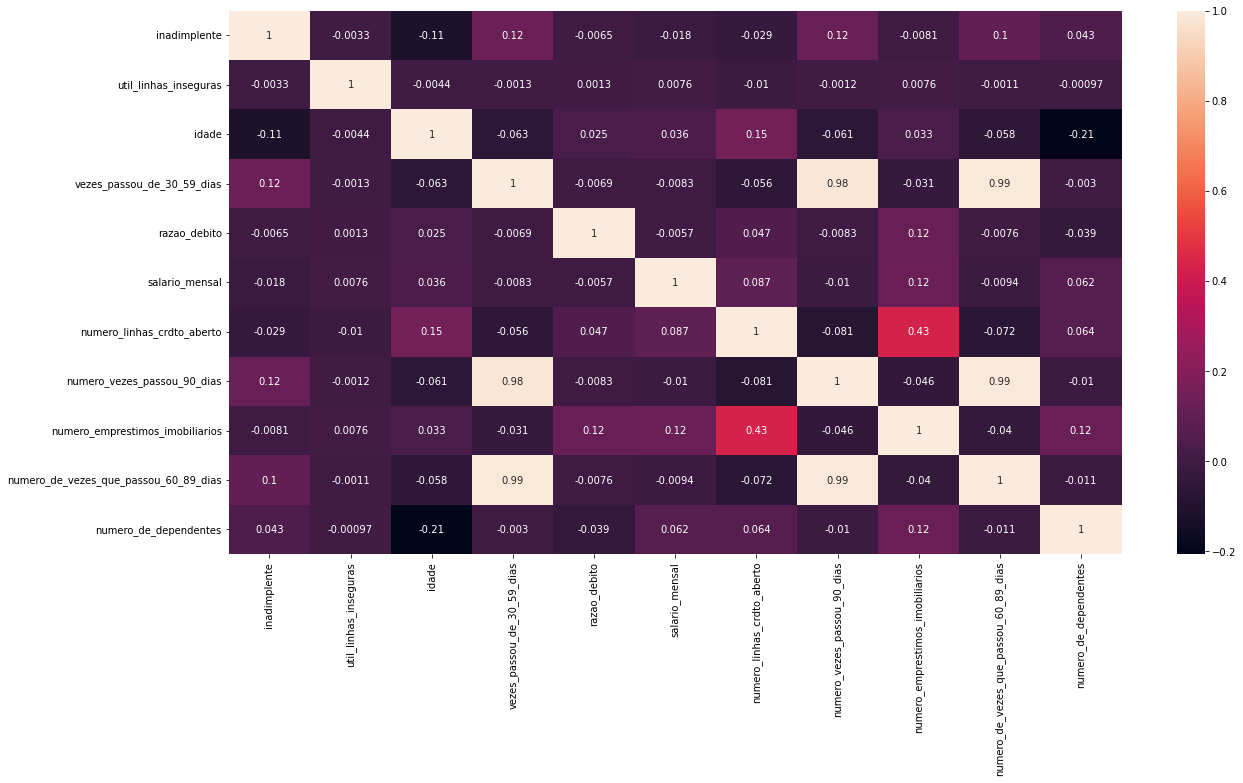

In [17]:
plt.figure(figsize=(20,10))
corr = df_train.corr()
corr = (corr)
sns.heatmap(corr, annot=True)

Algumas variaveis são interessantes, tais como:

- numero_vezes_passou_90_dias
- numreo_de_vezes_que_passou_60_89_dias
- idade
- util_linhas_inseguras

Aparentemente, nenhuma tem uma correlação muito forte

<AxesSubplot:xlabel='razao_debito'>

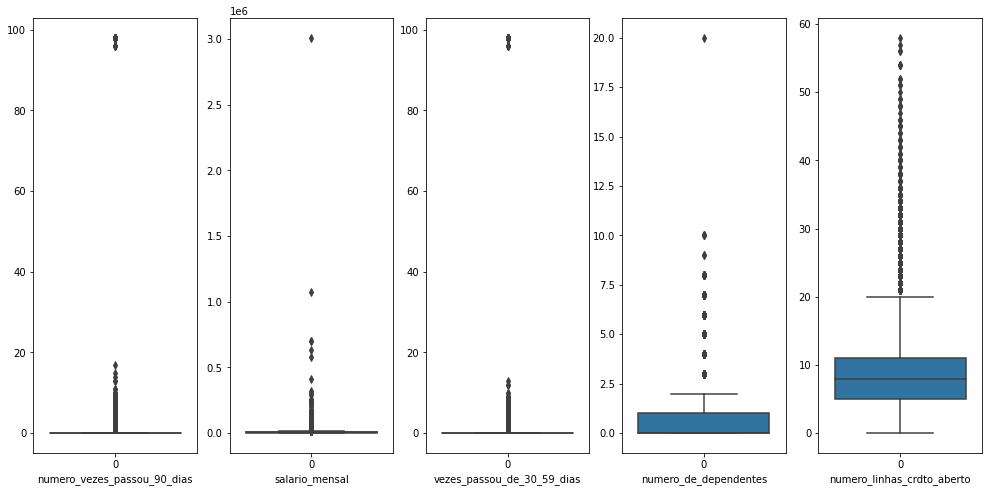

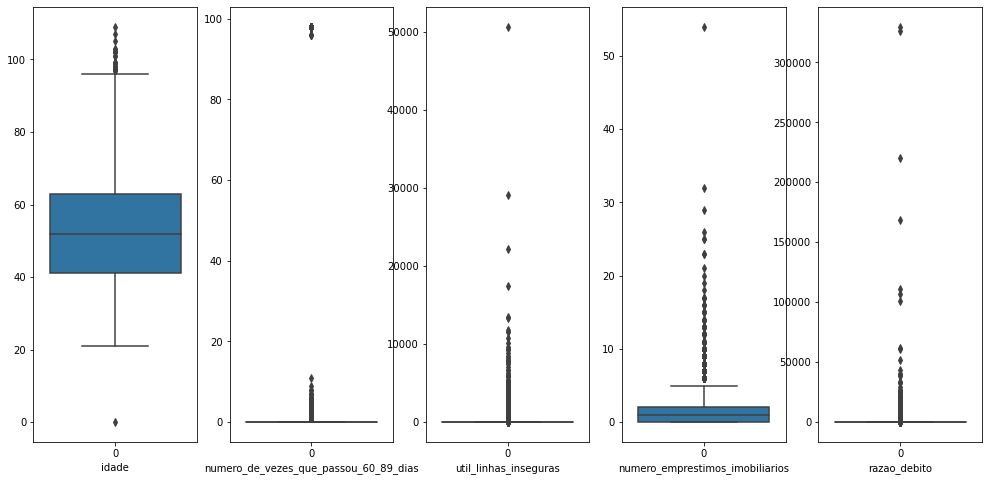

In [18]:
fig,ax = plt.subplots(1,5,figsize=(17,8))
ax[0].set_xlabel('numero_vezes_passou_90_dias')
sns.boxplot(ax=ax[0],data=df_train['numero_vezes_passou_90_dias'])
ax[1].set_xlabel('salario_mensal')
sns.boxplot(ax=ax[1],data=df_train['salario_mensal'])
ax[2].set_xlabel('vezes_passou_de_30_59_dias')
sns.boxplot(ax=ax[2],data=df_train['vezes_passou_de_30_59_dias'])
ax[3].set_xlabel('numero_de_dependentes')
sns.boxplot(ax=ax[3],data=df_train['numero_de_dependentes'])
ax[4].set_xlabel('numero_linhas_crdto_aberto')
sns.boxplot(ax=ax[4],data=df_train['numero_linhas_crdto_aberto'])

fig,ax = plt.subplots(1,5,figsize=(17,8))
ax[0].set_xlabel('idade')
sns.boxplot(ax=ax[0],data=df_train['idade'])
ax[1].set_xlabel('numero_de_vezes_que_passou_60_89_dias')
sns.boxplot(ax=ax[1],data=df_train['numero_de_vezes_que_passou_60_89_dias'])
ax[2].set_xlabel('util_linhas_inseguras')
sns.boxplot(ax=ax[2],data=df_train['util_linhas_inseguras'])
ax[3].set_xlabel('numero_emprestimos_imobiliarios')
sns.boxplot(ax=ax[3], data=df_train['numero_emprestimos_imobiliarios'])
ax[4].set_xlabel('razao_debito')
sns.boxplot(ax=ax[4], data=df_train['razao_debito'])

In [19]:
#df_train.drop(df_train[df_train['numero_vezes_passou_90_dias']>20].index,inplace=True)

df_train.drop(df_train[df_train['salario_mensal']>15000].index,inplace=True)
df_train.drop(df_train[df_train['salario_mensal']<0].index,inplace=True)

#df_train.drop(df_train[df_train['vezes_passou_de_30_59_dias']>20].index,inplace=True)

df_train.drop(df_train[df_train['numero_de_dependentes']>15].index,inplace=True)

df_train.drop(df_train[df_train['numero_linhas_crdto_aberto']>20].index,inplace=True)
df_train.drop(df_train[df_train['numero_linhas_crdto_aberto']<0].index,inplace=True)

df_train.drop(df_train[df_train['idade']>90].index,inplace=True)
df_train.drop(df_train[df_train['idade']<20].index,inplace=True)

#df_train.drop(df_train[df_train['numero_de_vezes_que_passou_60_89_dias']>20].index,inplace=True)

df_train.drop(df_train[df_train['util_linhas_inseguras']>1500].index,inplace=True)

df_train.drop(df_train[df_train['numero_emprestimos_imobiliarios']>10].index,inplace=True)

df_train.drop(df_train[df_train['razao_debito']>50000].index,inplace=True)

### Como o modelo se comportaria se as pessoas que atrasaram 1 vez mais do que 30 dias, fossem retiradas?

In [20]:
df_train = df_train[df_train['vezes_passou_de_30_59_dias']!=1]

- A acurácia sofre uma leve melhora quando retirei os clientes que atrasaram apenas uma vez

### Separando e tratando o conjunto de dados

In [21]:
target_name = 'inadimplente'
X = df_train.drop('inadimplente', axis=1)
y = df_train[target_name]

In [22]:
X.head()

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
3,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
5,0.213179,74,0,0.375607,3500.000000,3,0,1,0,1.0
6,0.305682,57,0,5710.000000,6637.411063,8,0,3,0,0.0


In [23]:
y.head()

0    1
1    0
3    0
5    0
6    0
Name: inadimplente, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import MinMaxScaler

# 1 - Aplicando modelos com o dataset desbalanceado

## Função da baseline

np.zeros -> retorna um array preenchido com zeros

In [25]:
def baseline_model(X):
  y = np.zeros(X.shape[0])
  return y

In [26]:
#Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(
   X, 
   y, 
   random_state=0, 
   test_size=0.50,
   stratify=y
   )

In [27]:
#Analise do baseline
p_val = baseline_model(X_val)

In [28]:
np.mean(y_val == p_val)

0.9428093935842341

## Arvore de decisão

In [29]:
#Treinando o modelo com arvore de decisão
dtree = DecisionTreeClassifier(max_depth=5, random_state=0)
dtree = dtree.fit(X_train, y_train)

O max_depth acerta mais 1 do que o min_samples_leaf

Fiz testes aleatórios e verifiquei que o max_depth = 5 possui a melhor acurácia, foi o indicativo utilizado para continuar com o parametro == 5

**Resultado testeando o Maxdepth**

None -> 0.8974181818181818

1 -> 0.9334545454545454

5 -> 0.9354727272727272

10 -> 0.932509090909091


**Resultado testeando o min_samples_leaf**

None -> 0.8978727272727273

1 -> 0.8978727272727273

5 -> 0.919290909090909

10 -> 0.9280363636363637

In [30]:
p_val = dtree.predict(X_val)

**Fazendo avaliação do modelo**

In [31]:
#Verificando a acuracia
accuracy_score(p_val, y_val)

0.9443720970612492

In [32]:
#Verificando a curva ROC
roc_auc_score(y_val, p_val)

0.5951192566356109

O modelo não está bom, só está praticamente acertando o que é 0, ou seja, que não é inadimplente.

Outr métrica utilizada para avaliação, foi a precisão, imaginando que uma pessoa que deseja obter um crédito com o banco, é desejável ter uma alta precisão, pois o banco não gostaria de perder clientes que tiveram um empréstimo negado com base na previsão do modelo de que seriam inadimplentes.

In [33]:
print(classification_report(y_val, p_val))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     43439
           1       0.54      0.20      0.29      2635

    accuracy                           0.94     46074
   macro avg       0.74      0.60      0.63     46074
weighted avg       0.93      0.94      0.93     46074



Com base na ROC o modelo basicamente só acerta os casos que são 0, quando faz a media entre a classe 0 e 1 a curva ROC mostra uma % de quase 50%, está quase um processo aleatório.

In [34]:
print(pd.crosstab(y_val, p_val, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0    1    All
Real                      
0        42982  457  43439
1         2106  529   2635
All      45088  986  46074


## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
#Instanciando o algoritmo
logistic = LogisticRegression(max_iter=1000)

In [37]:
#Realizando o treinamento
logistic.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [38]:
#Calculando as predições
p_val = logistic.predict(X_val)

In [39]:
#Avaliando o modelo
np.mean(y_val == p_val)

0.9431349568086123

In [40]:
#Resultado ponderado das classes 0 e 1
roc_auc_score(y_val, p_val)

0.5368906988285564

In [41]:
print(classification_report(y_val, p_val))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     43439
           1       0.52      0.08      0.14      2635

    accuracy                           0.94     46074
   macro avg       0.73      0.54      0.55     46074
weighted avg       0.92      0.94      0.92     46074



In [42]:
print(pd.crosstab(y_val, p_val, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0    1    All
Real                      
0        43248  191  43439
1         2429  206   2635
All      45677  397  46074


## Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [44]:
#Realizando o treinamento
rf = rf.fit(X_train, y_train)

In [45]:
p_val = rf.predict(X_val)

In [46]:
#Avaliando o modelo
print(np.mean(y_val == p_val))
print(roc_auc_score(y_val, p_val))
print(classification_report(y_val, p_val))
print(pd.crosstab(y_val, p_val, rownames=['Real'],colnames=['Predito'],margins=True))

0.9438294916872857
0.5896624519113435
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     43439
           1       0.52      0.19      0.28      2635

    accuracy                           0.94     46074
   macro avg       0.74      0.59      0.62     46074
weighted avg       0.93      0.94      0.93     46074

Predito      0    1    All
Real                      
0        42986  453  43439
1         2135  500   2635
All      45121  953  46074


A area sobre a curva do randomforest foi a melhor até o momento

Todos os modelos treinados com a base desbalanceada não tiveram um resultado bom

# 2 - Aplicando o modelo com o dataset balanceado

## Aplicando o SMOTE

- Gerar dados sintéticos da classe minoritária

In [47]:
# Separa os dados e as classes
target_name = 'inadimplente'
X = df_train.drop('inadimplente', axis=1)
y = df_train[target_name]

In [48]:
#Vou utilizar o min_max_scaler para deixar todas as features na mesma escala, as escalas do salarios são diferente de outras features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [49]:
# Instância o SMOTE
smt = SMOTE()

In [50]:
#Aplica o SMOTE nos dados
X, y = smt.fit_resample(X,y)

<AxesSubplot:xlabel='inadimplente', ylabel='count'>

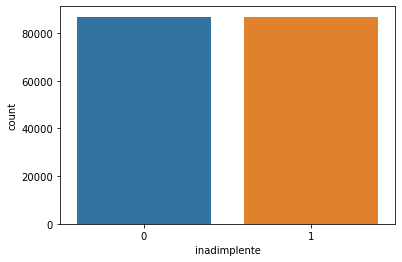

In [51]:
#Visualizando a distribuição
sns.countplot(x=y)

In [52]:
#Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(
   X, 
   y, 
   random_state=0, 
   test_size=0.50,
   stratify=y
   )

## Random Forest

- random_state = uma random_forest quando está criando o modelo tem várias pontos que vai ser utilizada a aleatoriedade e por conta disso é utilizado o random_state para fixar a aleatoriedade, permitindo que os resultados sejam reprodutiveis

- n_jobs = demonstra a quantidade de arvores em paralelo que o modelo irá criar...o -1 informa que serão utilizados todos os threads disponíveis no computador para criação das arvores

- Quando testei os hiperparametros (max_depth e min_samples_leaf) o resultado do modelo piorou, por conta disso utilizei os parametrôs default

In [87]:
#Treinar o modelo
#Escolhi o random forest pois tinha sido o melhor modelo antes de aplicar o SMOTE
rf = RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=300, max_depth=30)

In [88]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=300, n_jobs=-1,
                       random_state=0)

In [89]:
p_val = rf.predict(X_val)

In [90]:
#Avaliando o modelo
print(np.mean(y_val == p_val))
print(roc_auc_score(y_val, p_val))
print(classification_report(y_val, p_val))
print(pd.crosstab(y_val, p_val, rownames=['Real'],colnames=['Predito'],margins=True))

0.9504702050024748
0.9504700199042847
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     43439
           1       0.97      0.93      0.95     43438

    accuracy                           0.95     86877
   macro avg       0.95      0.95      0.95     86877
weighted avg       0.95      0.95      0.95     86877

Predito      0      1    All
Real                        
0        41986   1453  43439
1         2850  40588  43438
All      44836  42041  86877


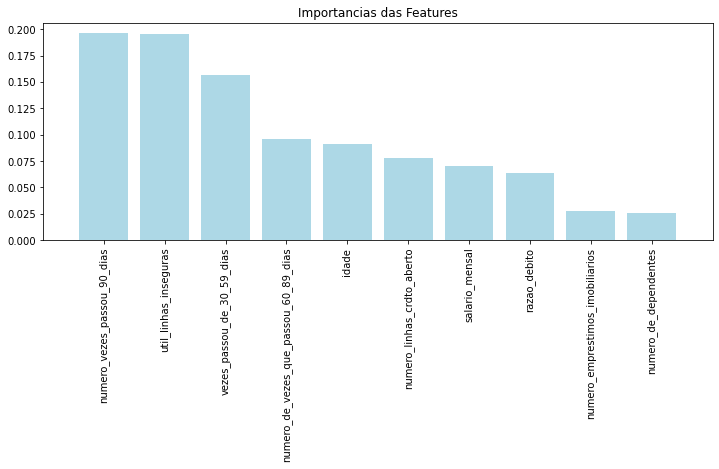

In [57]:
#Verificar quais as principais variaveis para o modelo
importances = rf.feature_importances_
feat_names = df_train.drop(['inadimplente'], axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,4))
plt.title("Importancias das Features")
plt.bar(range(len(indices)), importances[indices],color='lightblue')
plt.xticks(range(len(indices)), feat_names[indices], rotation = 'vertical')
plt.xlim([-1, len(indices)])
plt.show()

O modelo conseguiu bater a baseline. Portanto esse será o escolhido para fazer predição.

# 3 - Predição do modelo

In [58]:
X_test = df_test

In [59]:
#Vou utilizar o min_max_scaler para deixar todas as features na mesma escala, as escalas do salarios são diferente de outras features
X_test = scaler.fit_transform(X_test)

In [60]:
X_train.shape, y_train.shape, X_test.shape

((86877, 10), (86877,), (40000, 10))

In [61]:
p = rf.predict(X_test)

In [62]:
p

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

Incluindo a predição na base de teste

In [63]:
df_test['inadimplente'] = p

In [64]:
df_test.head()

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,inadimplente
0,0.025849,62,0,0.081775,8180.0,3,0,2,0,0.0,0
1,0.667083,55,0,0.153112,2200.0,3,0,0,0,0.0,0
2,0.007093,44,0,0.148800,7499.0,20,0,1,0,0.0,0
3,0.091213,54,0,0.351635,5900.0,15,0,1,1,0.0,0
4,0.112680,54,0,0.065959,2167.0,3,0,0,0,0.0,0


In [65]:
df_test[df_test['inadimplente']==1]

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,inadimplente
7,0.000000,76,1,0.261611,1700.000000,4,0,0,0,0.0,1
8,0.062280,55,0,0.406667,15658.000000,14,1,3,0,0.0,1
9,0.479899,41,1,0.209903,8441.000000,6,0,3,0,0.0,1
11,0.843405,56,1,0.592720,6400.000000,5,0,2,0,1.0,1
14,0.964024,41,0,0.059349,10749.000000,9,1,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
39979,0.073758,63,1,0.392101,6000.000000,15,0,1,0,0.0,1
39982,0.974605,42,1,0.130724,1200.000000,3,0,0,1,0.0,1
39984,0.420788,48,1,1333.000000,6760.601836,7,0,0,0,0.0,1
39995,0.000000,68,1,0.062858,10833.000000,9,1,0,0,0.0,1


In [66]:
df_test.to_csv('resultado_predic_rafael_santos.csv')